# Assignment: House Price Prediction using Advanced Regression

**Problem Statement**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market.

The company wants to know:
- How price of the house is dependent on other features, and
- Get a model that can predict the price of a house.

### Analysis Approach
We'll perform **Regularized Regression** on the given data in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [1]:
# Supressing unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

%matplotlib inline

# Pandas display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_columns', 200)
pd.set_option('display.max_colwidth', -1)
pd.set_option('float_format','{:f}'.format)

## Reading and Understanding the Data

In [3]:
# Read the dataset

surprise_housing = pd.read_csv('train.csv')
surprise_housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.000000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.000000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,B

In [4]:
# Inspect the shape of the dataset

surprise_housing.shape

(1460, 81)

The dataset consists of **1460 rows** and **81 columns**.

In [5]:
# Inspect the different columns in the dataset

surprise_housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Finding the statistics of the numerical columns

surprise_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Check the info to see the types of the feature variables and the null values present

surprise_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.**

In [8]:
# Defining a function to find count, null, unique, datatype of each column in the dataframe

def df_attr(df):
    count = df.count()
    null = df.isnull().sum()
    null_perc = round(df.isnull().sum()/len(df.index)*100,4)
    unique = df.nunique()
    types = df.dtypes
    return pd.concat([count, null, null_perc, unique, types], 
                     axis = 1,keys=['COUNT','NULL','PERCENT','NUM_UNIQUE','DATATYPE']).sort_values(by='PERCENT',ascending=False)

In [9]:
# Finding the null values, null percentage, unique numbers and datatype of all variables in the dataset

house_attr = df_attr(surprise_housing)

house_attr.style.background_gradient(cmap='Reds',subset=['NULL','PERCENT'])

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
PoolQC,7,1453,99.520500,3,object
MiscFeature,54,1406,96.301400,4,object
Alley,91,1369,93.767100,2,object
Fence,281,1179,80.753400,4,object
FireplaceQu,770,690,47.260300,5,object
LotFrontage,1201,259,17.739700,110,float64
GarageYrBlt,1379,81,5.547900,97,float64
GarageCond,1379,81,5.547900,5,object
GarageType,1379,81,5.547900,6,object
GarageFinish,1379,81,5.547900,3,object


Some of the variables having high number of null values. So, we'll deal with these in the data cleaning part.

## Data Cleaning

#### 'Id' column is also of no use for our analysis hence dropping the column

In [10]:
surprise_housing.drop('Id', axis=1, inplace=True)

### Null value treatment

#### Considering 40% as my threshold and dropping the column having more then the threshold

In [11]:
# Drop all the columns in which greater than 40% missing values are present

surprise_housing = surprise_housing.drop(surprise_housing.columns
                                        [surprise_housing.apply(lambda col: col.isnull().sum()/len(surprise_housing) > 0.40)],
                                         axis=1)

In [12]:
# Checking the percentage of remanining columns with missing values

round(100*(surprise_housing.isnull().sum()/len(surprise_housing.index)), 2)[round(100*(surprise_housing.isnull().
                                                                                       sum()/len(surprise_housing.index)), 2)
                                                                                        .values>0.00]

LotFrontage    17.740000
MasVnrType     0.550000 
MasVnrArea     0.550000 
BsmtQual       2.530000 
BsmtCond       2.530000 
BsmtExposure   2.600000 
BsmtFinType1   2.530000 
BsmtFinType2   2.600000 
Electrical     0.070000 
GarageType     5.550000 
GarageYrBlt    5.550000 
GarageFinish   5.550000 
GarageQual     5.550000 
GarageCond     5.550000 
dtype: float64

### Imputing missing value
Instead of dropping the null values which will result in a data loss, we will impute the null values according to the domain understanding and the data dictionary provided with the data.

In [13]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

surprise_housing['GarageType'].fillna('No Garage', inplace=True)  
surprise_housing['GarageQual'].fillna('No Garage', inplace=True) 
surprise_housing['GarageCond'].fillna('No Garage', inplace=True)

In [14]:
surprise_housing.GarageYrBlt.fillna(0,inplace=True)
surprise_housing.GarageFinish.fillna('Unf',inplace=True)

In [15]:

surprise_housing.BsmtQual.fillna('TA',inplace=True)
surprise_housing.BsmtCond.fillna('TA',inplace=True)
surprise_housing.BsmtExposure.fillna('No',inplace=True)
surprise_housing.BsmtFinType1.fillna('Unf',inplace=True)
surprise_housing.BsmtFinType2.fillna('Unf',inplace=True)

In [16]:
surprise_housing['LotFrontage'].fillna(0, inplace=True) 

In [17]:
surprise_housing['MasVnrType'].fillna('None', inplace=True) 

In [18]:
surprise_housing['MasVnrArea'].fillna(0, inplace=True) 

In [19]:
# Finding the value counts of 'Electrical' column
surprise_housing['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA    94  
FuseF    27  
FuseP    3   
Mix      1   
NaN      1   
Name: Electrical, dtype: int64

Filling the missing values in `Electrical` column with its mode.

In [20]:
# Filling the null values in 'Electrical' column with 'SBrkr'
surprise_housing['Electrical'].fillna('SBrkr', inplace=True)

surprise_housing['Electrical'].value_counts(dropna=False)

SBrkr    1335
FuseA    94  
FuseF    27  
FuseP    3   
Mix      1   
Name: Electrical, dtype: int64

### Dealing with highly skewed categorical data

In [21]:
# Checking for skewed categorical columns
obj_cols = surprise_housing.select_dtypes(exclude=['int64', 'float64'])

for col in obj_cols:
    if(surprise_housing[col].value_counts(normalize=True).max() >= 0.75):
        print(f'- {col} : {round(surprise_housing[col].value_counts(normalize=True).max()*100,2)}%')

- MSZoning : 78.84%
- Street : 99.59%
- LandContour : 89.79%
- Utilities : 99.93%
- LandSlope : 94.66%
- Condition1 : 86.3%
- Condition2 : 98.97%
- BldgType : 83.56%
- RoofStyle : 78.15%
- RoofMatl : 98.22%
- ExterCond : 87.81%
- BsmtCond : 92.33%
- BsmtFinType2 : 88.63%
- Heating : 97.81%
- CentralAir : 93.49%
- Electrical : 91.44%
- Functional : 93.15%
- GarageQual : 89.79%
- GarageCond : 90.82%
- PavedDrive : 91.78%
- SaleType : 86.78%
- SaleCondition : 82.05%


We'll remove all the categorical columns with more than 85% of their values in one category

In [22]:
# Finding the categorical columns with highly skewed distribution i.e., >85% in one category
skew_obj_cols = []
print('Categorical columns with more than 85% of their values in a single category:')

for col in obj_cols:
    if(surprise_housing[col].value_counts(normalize=True).max() >= 0.85):
        skew_obj_cols.append(col)
        print(f'- {col}')

Categorical columns with more than 85% of their values in a single category:
- Street
- LandContour
- Utilities
- LandSlope
- Condition1
- Condition2
- RoofMatl
- ExterCond
- BsmtCond
- BsmtFinType2
- Heating
- CentralAir
- Electrical
- Functional
- GarageQual
- GarageCond
- PavedDrive
- SaleType


In [23]:
# Dropping the highly skewed categorical columns
surprise_housing.drop(skew_obj_cols, axis=1, inplace=True)
surprise_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

In [24]:
house_attr = df_attr(surprise_housing)
house_attr.style.background_gradient(cmap='Reds',subset=['NULL','PERCENT'])

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
MSSubClass,1460,0,0.000000,15,int64
2ndFlrSF,1460,0,0.000000,417,int64
GrLivArea,1460,0,0.000000,861,int64
BsmtFullBath,1460,0,0.000000,4,int64
BsmtHalfBath,1460,0,0.000000,3,int64
FullBath,1460,0,0.000000,4,int64
HalfBath,1460,0,0.000000,3,int64
BedroomAbvGr,1460,0,0.000000,8,int64
KitchenAbvGr,1460,0,0.000000,4,int64
KitchenQual,1460,0,0.000000,4,object


**_Now, there are no null values in the dataset._**

### Dealing with highly skewed numerical data

In [25]:
# Checking for skewed numerical data
num_cols = surprise_housing.select_dtypes(include=['int64', 'float'])

for col in num_cols:
    if(surprise_housing[col].value_counts(normalize=True).max() >= 0.75):
        print(f'- {col} : {round(surprise_housing[col].value_counts(normalize=True).max()*100, 2)}%')

- BsmtFinSF2 : 88.56%
- LowQualFinSF : 98.22%
- BsmtHalfBath : 94.38%
- KitchenAbvGr : 95.34%
- EnclosedPorch : 85.75%
- 3SsnPorch : 98.36%
- ScreenPorch : 92.05%
- PoolArea : 99.52%
- MiscVal : 96.44%


In [26]:
# Finding the numerical columns with highly skewed distribution i.e., >85% having one value
skew_num_cols = []
print('Numerical columns with more than 85% of their values having same value:')
for col in num_cols:
    if(surprise_housing[col].value_counts(normalize=True).max() >= 0.85):
        skew_num_cols.append(col)
        print(f'- {col}')

Numerical columns with more than 85% of their values having same value:
- BsmtFinSF2
- LowQualFinSF
- BsmtHalfBath
- KitchenAbvGr
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal


In [27]:
surprise_housing.drop(skew_num_cols, axis=1, inplace=True)
surprise_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

count   1460.000000
mean    0.476712   
std     0.499629   
min     0.000000   
25%     0.000000   
50%     0.000000   
75%     1.000000   
max     1.000000   
Name: Remodelled, dtype: float64


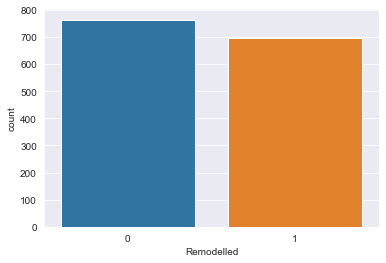

In [28]:
# Adding a new column to check whether the house has been remodelled or not

surprise_housing['Remodelled'] = surprise_housing.apply(lambda x: 0 
                                                        if x['YearBuilt'] == x['YearRemodAdd'] 
                                                        else (1 if x['YearBuilt'] < x['YearRemodAdd'] else 2)
                                                        , axis=1)
print(surprise_housing['Remodelled'].describe())

sns.countplot(surprise_housing['Remodelled']);

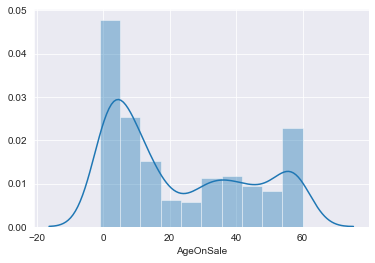

In [29]:
# Adding a new column to check the built/ rebuilt age of the house during the sale

surprise_housing['AgeOnSale'] = surprise_housing.apply(lambda x: x['YrSold'] - x['YearBuilt']
                                                       if x['YearBuilt'] == x['YearRemodAdd']
                                                       else x['YrSold'] - x['YearRemodAdd'], axis=1)
surprise_housing['AgeOnSale'].describe()

sns.distplot(surprise_housing['AgeOnSale']);

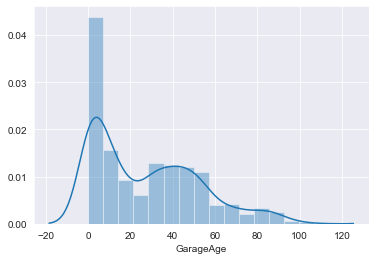

In [30]:
# Adding a new column to check the age of the garage during the sale

surprise_housing['GarageAge'] = surprise_housing.apply(lambda x: x['YrSold'] - x['GarageYrBlt'] 
                                                       if x['GarageYrBlt'] != 0
                                                       else 0, axis=1)
surprise_housing['GarageAge'].describe()

sns.distplot(surprise_housing['GarageAge']);

As we have derived the `Remodelled`, `AgeOnSale`, `GarageAge` from the variables `YearBuilt`, `YearRemodAdd`, `YrSold` and `GarageYrBlt`, we can drop these columns.

In [31]:
# Dropping the columns from which we have derived the information
surprise_housing.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold', 'GarageYrBlt'], axis=1, inplace=True)

### Outlier Treatment

In [32]:
# Identifying actual numerical variables

house_attr = df_attr(surprise_housing)

num_vars = list(house_attr.loc[(house_attr.DATATYPE != 'object') & (house_attr.NUM_UNIQUE >= 15)].index)

num_vars.remove('SalePrice')

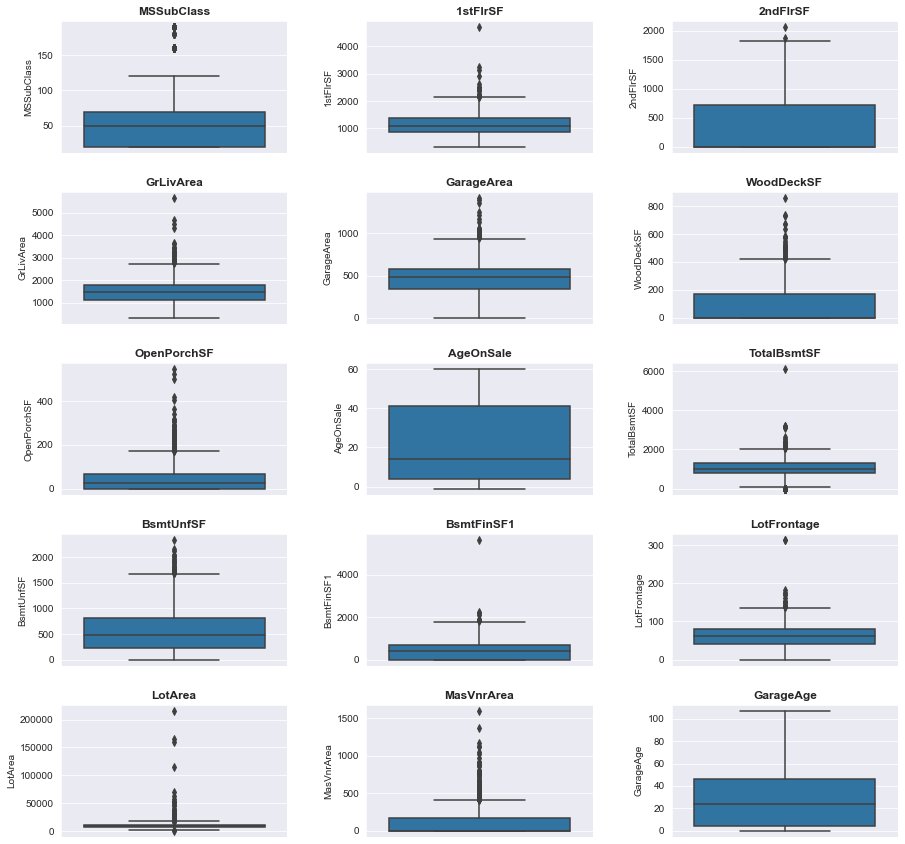

In [33]:
plt.figure(figsize = (15,15))

for i, col in enumerate(num_vars):
    plt.subplot(5, 3, i+1)
    sns.boxplot(y=col, data=surprise_housing)
    plt.title(col, weight='bold')
    
plt.subplots_adjust(wspace=0.35, hspace = 0.3)

In [34]:
surprise_housing[num_vars].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,MSSubClass,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,AgeOnSale,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1,LotFrontage,LotArea,MasVnrArea,GarageAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,1162.626712,346.992466,1515.463699,472.980137,94.244521,46.660274,22.950000,1057.429452,567.240411,443.639726,57.623288,10516.828082,103.117123,27.680137
std,42.300571,386.587738,436.528436,525.480383,213.804841,125.338794,66.256028,20.640653,438.705324,441.866955,456.098091,34.664304,9981.264932,180.731373,24.950144
min,20.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000
25%,20.000000,882.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,4.000000,795.750000,223.000000,0.000000,42.000000,7553.500000,0.000000,4.000000
50%,50.000000,1087.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,14.000000,991.500000,477.500000,383.500000,63.000000,9478.500000,0.000000,23.500000
75%,70.000000,1391.250000,728.000000,1776.750000,576.000000,168.000000,68.000000,41.000000,1298.250000,808.000000,712.250000,79.000000,11601.500000,164.250000,46.000000
90%,120.000000,1680.000000,954.200000,2158.300000,757.100000,262.000000,130.000000,56.000000,1602.200000,1232.000000,1065.500000,92.000000,14381.700000,335.000000,61.000000
95%,160.000000,1831.250000,1141.050000,2466.100000,850.100000,335.000000,175.050000,58.000000,1753.000000,1468.000000,1274.000000,104.000000,17401.150000,456.000000,78.000000
99%,190.000000,2219.460000,1418.920000,3123.480000,1002.790000,505.460000,285.820000,60.000000,2155.050000,1797.050000,1572.410000,137.410000,37567.640000,791.280000,90.000000


In [35]:
outlier_cols = ['GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '1stFlrSF', 
                'TotalBsmtSF', 'LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1']

# Removing the outliers above 99th percentile

for col in outlier_cols:
    surprise_housing = surprise_housing[surprise_housing[col] < surprise_housing[col].quantile(0.99)]

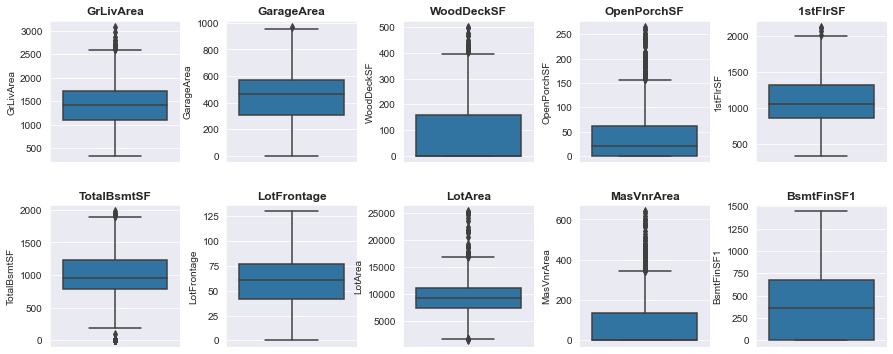

In [36]:
plt.figure(figsize = (15,6))

for i, col in enumerate(outlier_cols):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=col, data=surprise_housing)
    plt.title(col, weight='bold')
    
plt.subplots_adjust(wspace=0.35, hspace = 0.3)

We've removed most of the outliers which were present earlier.

In [37]:
print(f'Percentage of rows retained: {round(surprise_housing.shape[0]/1460, 2)*100}%')

Percentage of rows retained: 90.0%


- Still we have lots of data with us

## Data Visualisation

We'll first visualise the target variable `SalePrice`

Skew: 1.03
Kurtosis: 1.4


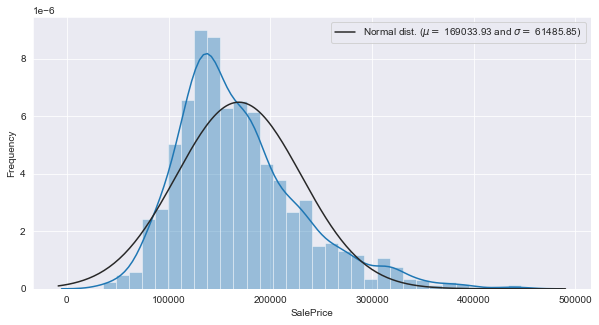

In [38]:
print(f'Skew: {round(surprise_housing.SalePrice.skew(), 2)}')
print(f'Kurtosis: {round(surprise_housing.SalePrice.kurtosis(), 2)}')

# Visualising the target variable 'SalePrice'

plt.figure(figsize=(10,5))
sns.distplot(surprise_housing['SalePrice'], fit=stats.norm)
mu, sigma = stats.norm.fit(surprise_housing['SalePrice'])
plt.legend([f'Normal dist. ($\mu=$ {round(mu,2)} and $\sigma=$ {round(sigma,2)})'], loc='best')
plt.ylabel('Frequency')
plt.show()

Looks like our target variable is Right skewed. So, we'll apply log transformation to reduce the skewness.

Skew: -0.15
Kurtosis: 0.57


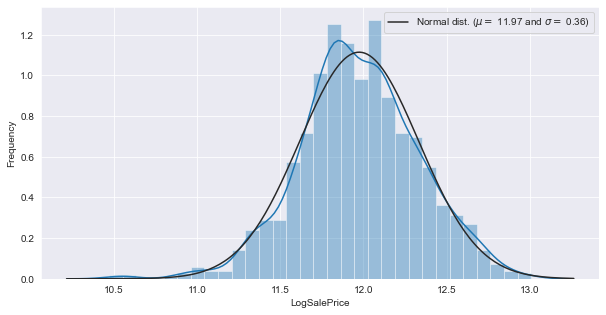

In [39]:
# Performing log transformation to reduce the skewness of the variable
surprise_housing['LogSalePrice'] = np.log(surprise_housing['SalePrice'])
print(f'Skew: {round(surprise_housing.LogSalePrice.skew(), 2)}')
print(f'Kurtosis: {round(surprise_housing.LogSalePrice.kurtosis(), 2)}')

plt.figure(figsize=(10,5))
sns.distplot(surprise_housing['LogSalePrice'], fit=stats.norm);
mu, sigma = stats.norm.fit(surprise_housing['LogSalePrice'])
plt.legend([f'Normal dist. ($\mu=$ {round(mu,2)} and $\sigma=$ {round(sigma,2)})'], loc='best')
plt.ylabel('Frequency')
plt.show()

Now, after the log transformation our target variable `SalePrice` is more or less normal.

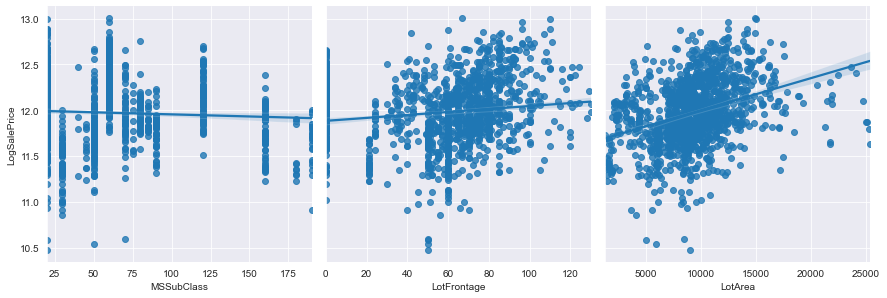

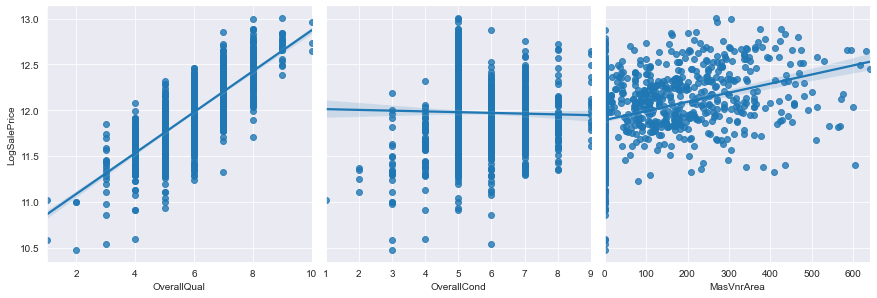

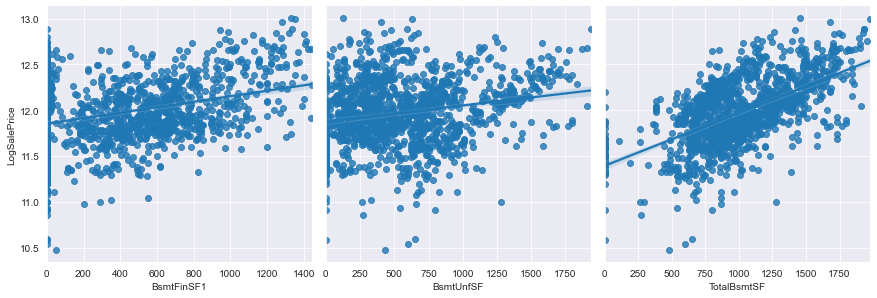

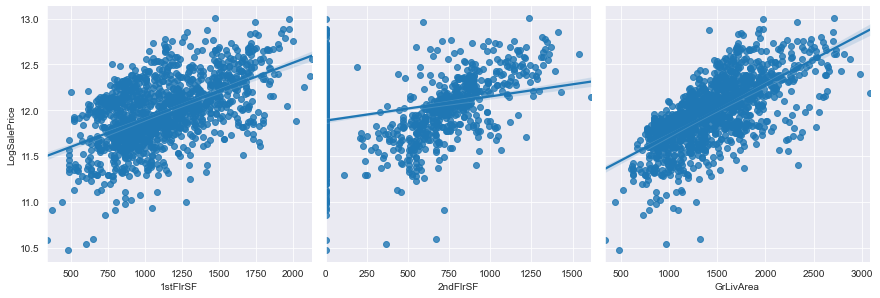

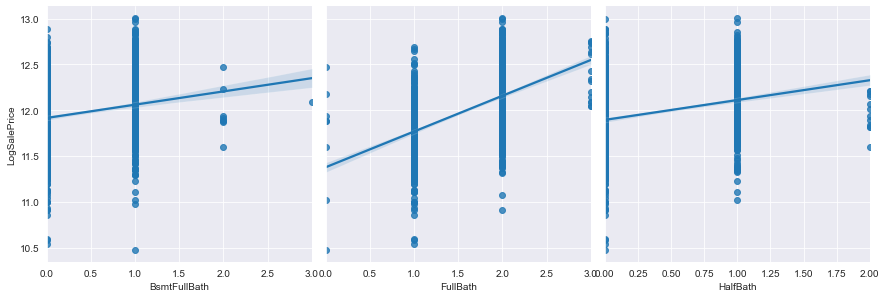

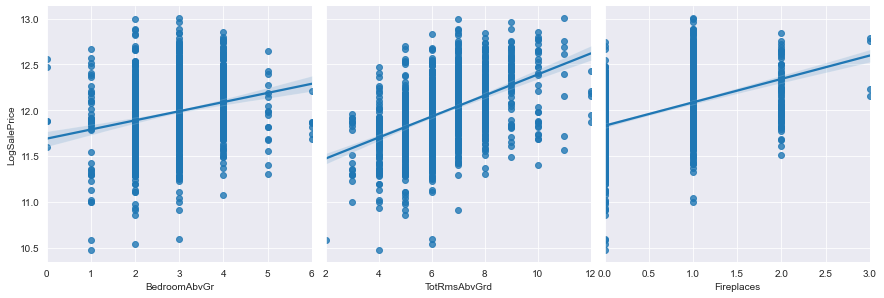

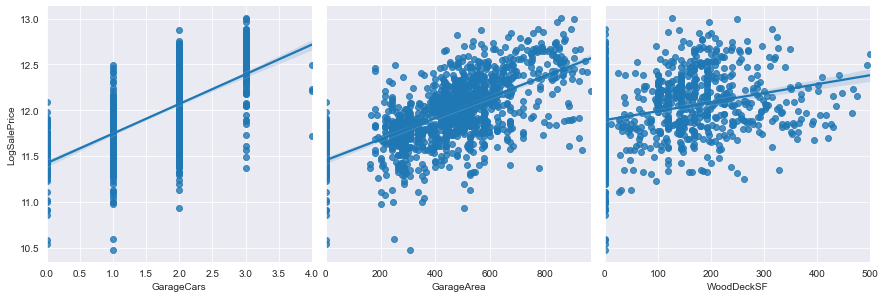

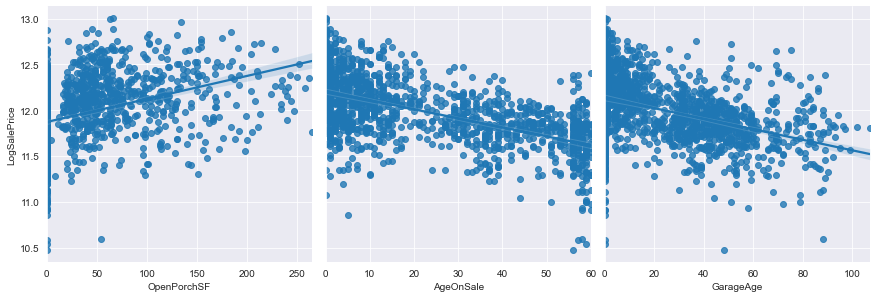

In [40]:
# Plotting to analyse the relation between numerical variables and target variable
num_cols = list(surprise_housing.select_dtypes(exclude='object').columns)
num_cols.remove('SalePrice')
num_cols.remove('LogSalePrice')
num_cols.remove('Remodelled')
num_cols_chunk = [num_cols[i:i+3] for i in range(0, len(num_cols), 3)]

for cols in num_cols_chunk:
    sns.pairplot(surprise_housing, x_vars=cols, y_vars='LogSalePrice', height=4, aspect=1, kind='reg');

From the above graphs,
- Most of the variables like `OverallQual`, `GrLivArea`, `1stFlrSF` are directly proportional to `SalePrice`.
- Some variables like `AgeOnSale`, `GarageAge` are inversely proportional to `SalePrice`.
- `OverallCond` doesnot change much with the `SalePrice`.

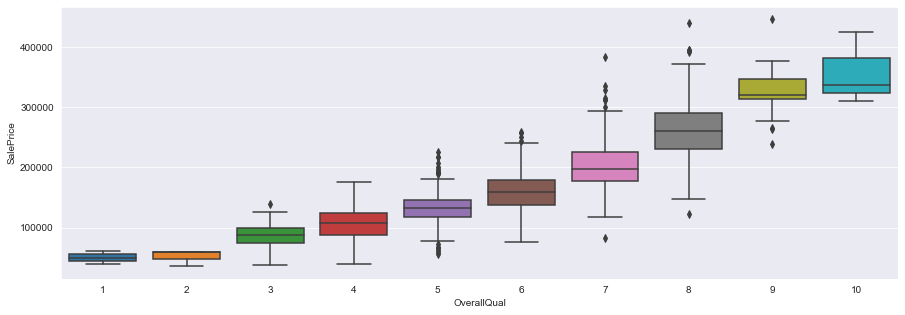

In [41]:
# Plotting 'OverallQual' vs 'SalePrice'

plt.figure(figsize=(15,5))

sns.boxplot(y='SalePrice', x='OverallQual', data=surprise_housing);

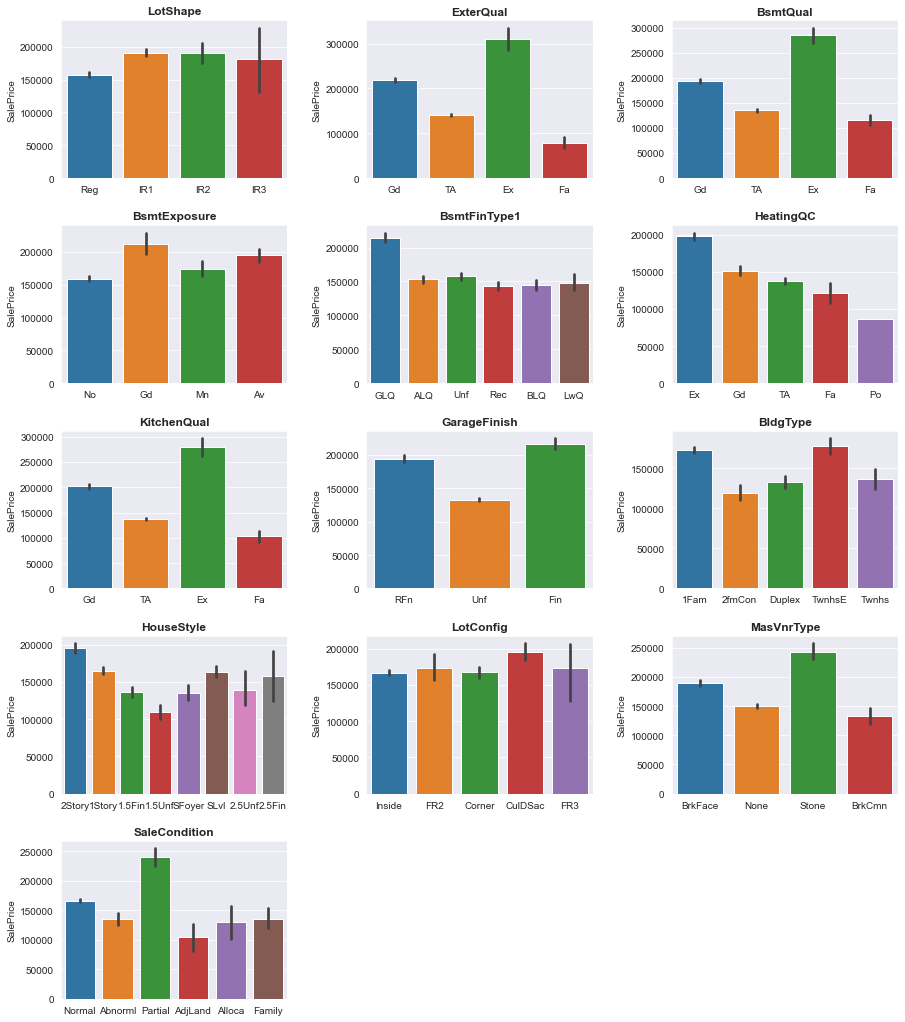

In [42]:
# Comparing the 'SalePrice' of various ordinal categorical columns
ord_cols = ['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 
             'GarageFinish', 'BldgType', 'HouseStyle', 'LotConfig', 'MasVnrType', 'SaleCondition']

plt.figure(figsize=(15,18))
for i, col in enumerate(ord_cols):
    plt.subplot(5, 3, i+1)
    sns.barplot(x=col, y='SalePrice', data=surprise_housing)
    plt.title(col, weight='bold')
    plt.xlabel(None)
plt.subplots_adjust(wspace=0.35, hspace = 0.3) 

- Excellent quality of external material, basement, kitchen and heating are more likely to fetch higher `SalePrice`.
- Partial `SaleCondition` has higher average `SalePrice` than other types.
- Garages with finished or rough finished interiors are more likely to fetch higher `SalePrice`.
- Masony veneer finished with stone has higher average `SalePrice`.

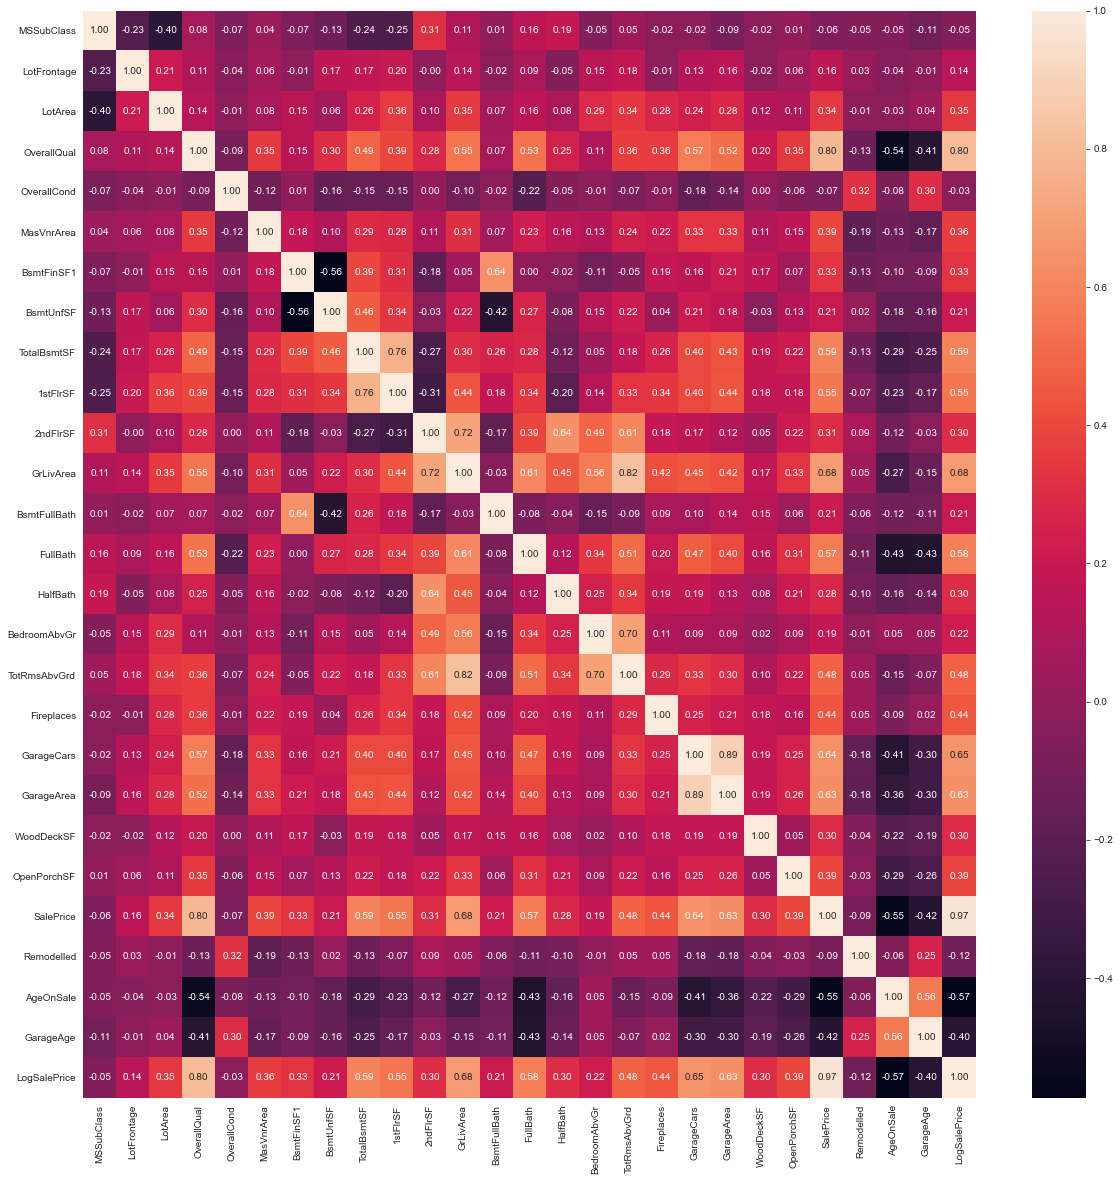

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(surprise_housing.corr(), annot=True, fmt='.2f');

From the above heatmap we can see that,
- The target variable, `SalePrice` is highly correlated with `OverallQual`(80%), `GrLivArea`(68%) and `GarageCars`(64%).
- `GrLivArea` is highly correlated with `TotRmsAbvGrd` at 82%. 
- `GarageCars` and `GarageArea` are highly correlated at 89%.

In [44]:
# We'll drop 'TotRmsAbvGrd' and 'GarageArea' as it might cause multicollinearity

surprise_housing.drop(['TotRmsAbvGrd', 'GarageArea'], axis=1, inplace=True)

## Data Preparation
### Assigning values to ordinal categorical variables

In [45]:
# Assigning values to ordinal categorical variables

surprise_housing['n_LotConfig'] = surprise_housing['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 'None': 0  })
surprise_housing['n_MasVnrType'] = surprise_housing['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
surprise_housing['n_SaleCondition'] = surprise_housing['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                       'Alloca': 0, 'AdjLand': 0, 'None': 0})
surprise_housing['n_LotShape'] = surprise_housing['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
surprise_housing['n_ExterQual'] = surprise_housing['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
surprise_housing['n_BsmtQual'] = surprise_housing['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
surprise_housing['n_BsmtExposure'] = surprise_housing['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
surprise_housing['n_BsmtFinType1'] = surprise_housing['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
surprise_housing['n_HeatingQC'] = surprise_housing['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
surprise_housing['n_KitchenQual'] = surprise_housing['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
surprise_housing['n_GarageFinish'] = surprise_housing['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
surprise_housing['n_BldgType'] = surprise_housing['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
surprise_housing['n_HouseStyle'] = surprise_housing['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })

In [46]:
surprise_housing['n_GarageFinish']

0       2
1       2
2       2
3       1
4       2
5       1
6       2
7       2
8       1
9       2
10      1
11      3
12      1
13      2
14      2
15      1
16      3
17      1
18      1
19      1
20      2
21      1
22      2
23      1
24      1
25      2
26      1
27      2
28      2
29      1
30      1
31      1
32      2
33      2
34      3
35      3
36      1
38      1
39      1
40      2
41      2
42      2
43      1
44      2
45      2
46      2
47      2
48      1
49      1
50      3
51      1
52      1
54      1
55      2
56      3
57      2
59      1
60      1
61      1
62      2
63      1
65      2
67      2
68      1
69      3
71      1
72      3
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      3
81      3
82      2
83      1
84      3
85      1
86      3
87      2
88      1
89      1
90      1
91      1
92      1
93      1
94      2
95      3
96      2
97      3
98      1
99      1
100     2
101     3
102     1
103     2
104     1
106     1


In [47]:
# Dropping the variables for which we have assigned numerical values

surprise_housing.drop(ord_cols, axis=1, inplace=True)
surprise_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 0 to 1458
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1315 non-null   int64  
 1   MSZoning         1315 non-null   object 
 2   LotFrontage      1315 non-null   float64
 3   LotArea          1315 non-null   int64  
 4   Neighborhood     1315 non-null   object 
 5   OverallQual      1315 non-null   int64  
 6   OverallCond      1315 non-null   int64  
 7   RoofStyle        1315 non-null   object 
 8   Exterior1st      1315 non-null   object 
 9   Exterior2nd      1315 non-null   object 
 10  MasVnrArea       1315 non-null   float64
 11  Foundation       1315 non-null   object 
 12  BsmtFinSF1       1315 non-null   int64  
 13  BsmtUnfSF        1315 non-null   int64  
 14  TotalBsmtSF      1315 non-null   int64  
 15  1stFlrSF         1315 non-null   int64  
 16  2ndFlrSF         1315 non-null   int64  
 17  GrLivArea     

### Dummy Value Creation

In [48]:
# Creating dummies of the remaining categorical columns

cols = list(surprise_housing.select_dtypes('object').columns)

surprise_housing = pd.get_dummies(surprise_housing, drop_first=True, columns=cols)
surprise_housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,Remodelled,AgeOnSale,GarageAge,LogSalePrice,n_LotConfig,n_MasVnrType,n_SaleCondition,n_LotShape,n_ExterQual,n_BsmtQual,n_BsmtExposure,n_BsmtFinType1,n_HeatingQC,n_KitchenQual,n_GarageFinish,n_BldgType,n_HouseStyle,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60,65.000000,8450,7,5,196.000000,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,208500,0,5,5.000000,12.247694,5,1,1,3,4,4,1,6,5,4,2,1,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.000000,9600,6,8,0.000000,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,181500,0,31,31.000000,12.109011,2,0,1,3,3,4,4,5,5,3,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.000000,11250,7,5,162.000000,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,223500,1,6,7.000000,12.317167,5,1,1,2,4,4,2,6,5,4,2,1,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.000000,9550,7,5,0.000000,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,140000,1,36,8.000000,11.849398,4,0,0,2,3,3,1,5,4,4,1,1,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.000000,14260,8,5,350.000000,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,250000,0,8,8.000000,12.429216,2,1,1,2,4,4,3,6,5,4,2,1,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [49]:
surprise_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 0 to 1458
Data columns (total 110 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1315 non-null   int64  
 1   LotFrontage           1315 non-null   float64
 2   LotArea               1315 non-null   int64  
 3   OverallQual           1315 non-null   int64  
 4   OverallCond           1315 non-null   int64  
 5   MasVnrArea            1315 non-null   float64
 6   BsmtFinSF1            1315 non-null   int64  
 7   BsmtUnfSF             1315 non-null   int64  
 8   TotalBsmtSF           1315 non-null   int64  
 9   1stFlrSF              1315 non-null   int64  
 10  2ndFlrSF              1315 non-null   int64  
 11  GrLivArea             1315 non-null   int64  
 12  BsmtFullBath          1315 non-null   int64  
 13  FullBath              1315 non-null   int64  
 14  HalfBath              1315 non-null   int64  
 15  BedroomAbvGr        

### Train-Test Split

In [50]:
# Dividing the dataset into X and y

X = surprise_housing.drop(['LogSalePrice','SalePrice'], axis=1)
y = surprise_housing['LogSalePrice']

print(f'Shape of X: {X.shape} \t Shape of y: {y.shape}')

Shape of X: (1315, 108) 	 Shape of y: (1315,)


In [51]:
# Performing train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

print(f'Shape of X_train: {X_train.shape} \t Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape} \t Shape of y_test: {y_test.shape}')

Shape of X_train: (920, 108) 	 Shape of y_train: (920,)
Shape of X_test: (395, 108) 	 Shape of y_test: (395,)


### Feature Scaling

In [52]:
# Initialising the standard scaler
scaler = StandardScaler()

# Subsetting the columns which needs to be scaled
cols = list(X_train.select_dtypes(exclude='uint8').columns)

# Scaling the columns in train and test dataset using fit_transform and transform respectively
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

## Ridge Regression

In [53]:
# Instantiating the Ridge regressor
ridge = Ridge()

# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Performing Grid Search
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                              param_grid = params, 
                              scoring= 'neg_mean_absolute_error', 
                              cv = folds, 
                              return_train_score=True,
                              verbose = 1)            

ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
# Storing the results of Grid Search in a dataframe

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)

ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].\
                    sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
15,4.000000,-0.069899,-0.080418,1
14,3.000000,-0.069530,-0.080419,2
16,5.000000,-0.070238,-0.080448,3
17,6.000000,-0.070555,-0.080504,4
13,2.000000,-0.069061,-0.080560,5
18,7.000000,-0.070848,-0.080592,6
19,8.000000,-0.071115,-0.080671,7
20,9.000000,-0.071359,-0.080745,8
21,10.000000,-0.071588,-0.080826,9
12,1.000000,-0.068457,-0.080903,10


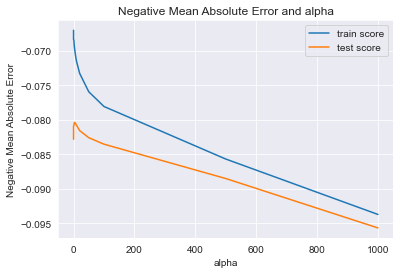

In [55]:
# Plotting the results of Grid Search 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [56]:
# Finding the optimal value of alpha
ridge_model_cv.best_estimator_

Ridge(alpha=4.0)

In [57]:
# Building the model using optimal value of alpha
alpha = 4.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01430979,  0.00037075,  0.02205672,  0.06878923,  0.04782428,
       -0.00380613,  0.01068824, -0.01122504,  0.05976591,  0.04324967,
        0.04895378,  0.03371662,  0.00613055,  0.01661671,  0.02114324,
        0.00702983,  0.01860501,  0.02526864,  0.01291582,  0.0031892 ,
       -0.01774618, -0.02459602, -0.02644694,  0.00201445,  0.00752733,
        0.01356377,  0.0019898 ,  0.00399583,  0.00936794,  0.00463183,
        0.01390144,  0.00861794,  0.01128301,  0.01645872, -0.01555772,
        0.01063049,  0.05055419,  0.03619762,  0.03766218,  0.01148832,
       -0.00347931, -0.01409869,  0.02495616,  0.00493445, -0.00487258,
        0.08790785, -0.05532552, -0.03687416, -0.03738931, -0.05657517,
       -0.03455936, -0.0098135 ,  0.03588702, -0.0456026 ,  0.01433955,
        0.08757264, -0.04755576, -0.0269546 , -0.02156432, -0.01150458,
        0.04208301,  0.12175292,  0.02100189,  0.00677844,  0.03649613,
        0.05375756,  0.04014652,  0.02911831, -0.0084906 ,  0.00

In [58]:
print(f'Mean squared error on test dataset: {round(metrics.mean_squared_error(y_test, ridge.predict(X_test)),4)}')

print(f'R-squared value on test dataset: {round(metrics.r2_score(y_test, ridge.predict(X_test)),4)}')

Mean squared error on test dataset: 0.0174
R-squared value on test dataset: 0.8695


In [59]:
# Finding the top 10 significant variables according to ridge regressor

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df = ridge_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

ridge_df.head(10)

,Features,Coefficient
0,Neighborhood_StoneBr,0.121800
1,Neighborhood_Crawfor,0.087900
2,Neighborhood_NridgHt,0.087600
3,Exterior1st_BrkFace,0.078000
4,OverallQual,0.068800
5,TotalBsmtSF,0.059800
6,RoofStyle_Gambrel,0.053800
7,MSZoning_FV,0.050600
8,2ndFlrSF,0.049000
9,OverallCond,0.047800


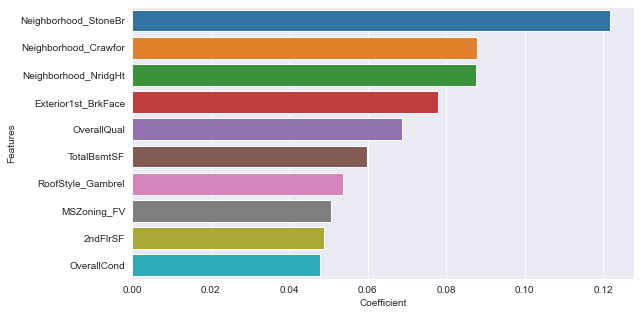

In [60]:
# Plotting the top 10 variables along with their coefficients

plt.figure(figsize=(9,5))
sns.barplot(y = 'Features', x='Coefficient', data = ridge_df.head(10))

plt.show()

#### Ridge Regression after doubling the alpha value

In [61]:
ridge = Ridge(alpha=8.0)
ridge.fit(X_train, y_train)

print(f'Mean squared error on test dataset: {round(metrics.mean_squared_error(y_test, ridge.predict(X_test)),4)}')
print(f'R-squared value on test dataset: {round(metrics.r2_score(y_test, ridge.predict(X_test)),4)}')

ridge_df_2 = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df_2 = ridge_df_2.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

ridge_df_2.head(10)

Mean squared error on test dataset: 0.0172
R-squared value on test dataset: 0.871


,Features,Coefficient
0,Neighborhood_StoneBr,0.094300
1,Neighborhood_Crawfor,0.078000
2,Neighborhood_NridgHt,0.072600
3,OverallQual,0.070900
4,Exterior1st_BrkFace,0.063000
5,TotalBsmtSF,0.056700
6,OverallCond,0.047600
7,2ndFlrSF,0.043400
8,1stFlrSF,0.039400
9,GrLivArea,0.039200


## Lasso Regression

In [62]:
# Instantiating the Lasso regressor
lasso = Lasso()

# List of alphas to tune
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005,
                    0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]}

# Preforming Grid Search

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,
                              param_grid = params, 
                              scoring= 'neg_mean_absolute_error', 
                              cv = folds, 
                              return_train_score=True, 
                              verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Storing the results of Grid Search in a dataframe

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].\
                sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.000300,-0.070546,-0.080048,1
3,0.000400,-0.071215,-0.080285,2
1,0.000200,-0.069638,-0.080323,3
4,0.000500,-0.071829,-0.080576,4
0,0.000100,-0.068303,-0.080905,5
5,0.001000,-0.074438,-0.082017,6
6,0.002000,-0.078706,-0.084872,7
7,0.003000,-0.080341,-0.085503,8
8,0.004000,-0.081070,-0.085776,9
9,0.005000,-0.081628,-0.086019,10


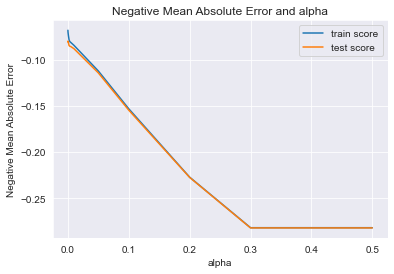

In [64]:
# Plotting the results of Grid Search 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [65]:
# Finding the optimal alpha value for lasso regressor

lasso_model_cv.best_estimator_

Lasso(alpha=0.0003)

In [66]:
# Building the model using optimal alpha value

alpha = 0.0003
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01344999,  0.0008081 ,  0.02035964,  0.07080928,  0.04772746,
       -0.00201734,  0.01145502, -0.0103207 ,  0.05792726,  0.0520842 ,
        0.05970762,  0.02298665,  0.00523826,  0.01568941,  0.01991221,
        0.00689527,  0.0184788 ,  0.02587881,  0.01224812,  0.00299095,
       -0.0184296 , -0.02507729, -0.02700967,  0.00095234,  0.00637567,
        0.01313871,  0.0010109 ,  0.00557415,  0.00946696,  0.00476929,
        0.01382824,  0.00852422,  0.0108824 ,  0.01611505, -0.01690391,
        0.00976005,  0.03814902,  0.00191427,  0.02251728, -0.        ,
       -0.        , -0.        ,  0.02582539,  0.        ,  0.        ,
        0.099645  , -0.04030408, -0.02417256, -0.02502982, -0.02738993,
       -0.0200928 ,  0.        ,  0.0012877 , -0.03295599,  0.00520917,
        0.09569824, -0.041052  , -0.00392142, -0.00550983, -0.        ,
        0.04622636,  0.14419497,  0.01680927,  0.        ,  0.        ,
        0.01299823,  0.00177543,  0.        , -0.        ,  0.  

In [67]:
print(f'Mean squared error on test dataset: {round(metrics.mean_squared_error(y_test, lasso.predict(X_test)),4)}')

print(f'R-squared value on test dataset: {round(metrics.r2_score(y_test, lasso.predict(X_test)),4)}')

Mean squared error on test dataset: 0.0174
R-squared value on test dataset: 0.8696


In [68]:
# Finding the top 10 significant variables according to lasso regressor

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df = lasso_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
lasso_df.head(20)

,Features,Coefficient
0,Neighborhood_StoneBr,0.144200
1,Neighborhood_Crawfor,0.099600
2,Neighborhood_NridgHt,0.095700
3,Exterior1st_BrkFace,0.075300
4,OverallQual,0.070800
5,2ndFlrSF,0.059700
6,TotalBsmtSF,0.057900
7,1stFlrSF,0.052100
8,OverallCond,0.047700
9,Neighborhood_Somerst,0.046200


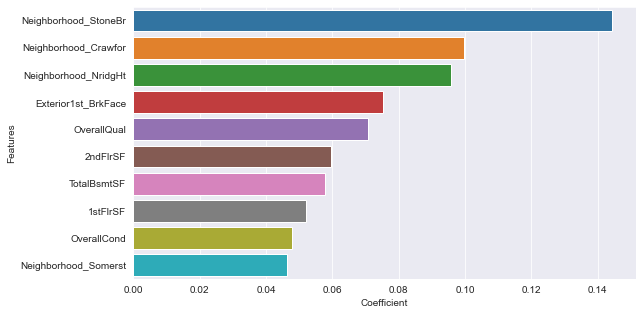

In [69]:
# Plotting top 10 significant variables along with their coefficients
plt.figure(figsize=(9,5))
sns.barplot(y = 'Features', x='Coefficient', data = lasso_df.head(10))
plt.show()

#### Lasso Regression after doubling the alpha

In [70]:
lasso = Lasso(alpha=0.0006)
lasso.fit(X_train, y_train)

print(f'Mean squared error on test dataset: {round(metrics.mean_squared_error(y_test, lasso.predict(X_test)),4)}')
print(f'R-squared value on test dataset: {round(metrics.r2_score(y_test, lasso.predict(X_test)),4)}')

lasso_df_2 = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df_2 = lasso_df_2.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

lasso_df_2.head(10)

Mean squared error on test dataset: 0.017
R-squared value on test dataset: 0.8724


,Features,Coefficient
0,Neighborhood_StoneBr,0.110900
1,Neighborhood_Crawfor,0.088700
2,Neighborhood_NridgHt,0.077300
3,OverallQual,0.074600
4,Exterior1st_BrkFace,0.066600
5,TotalBsmtSF,0.052600
6,OverallCond,0.047800
7,GrLivArea,0.044000
8,2ndFlrSF,0.039600
9,Neighborhood_Somerst,0.039200


## Conclusion

- The optimal value of lambda, mean squared error and R squared value of Ridge and Lasso Regression are as follows:
    - **Ridge Regression** : 
        - Optimal Lambda : 4.0
        - Mean squared error : 0.0174
        - R-squared value : 0.8695
    - **Lasso Regression** :
        - Optimal Lambda : 0.0003
        - Mean squared error : 0.0174
        - R-squared value : 0.8696
- From the above metrics, we can see that the Lasso Regression performs slightly better than the Ridge Regression. Moreover, Lasso helps in feature reduction by reducing the coefficients of redundant variables to 0.
- The top variables which help in determining the `SalePrice` of a house are as follows:
    - `Neighbourhood` - Physical location of the property in Stone Brook, Crawford, Northridge Heights and Somerset
    - `Exterior1st` - Exterior cover of the house is Brick Face
    - `OverallQual` - Rating of the overall material and finish of the house
    - `2ndFlrSF` - Area covered by 2nd floor of the property
    - `TotalBsmtSF` - Total area of the basement
    - `1stFlrSF` - Area covered by 1st floor of the property
    - `OverallCond` - Rating of the overall condition of the house.

## Subjective Question

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

## Lasso Regression

In [71]:
# Top 10 most important predictor variables in the lasso model

lasso_df.head(10)

,Features,Coefficient
0,Neighborhood_StoneBr,0.144200
1,Neighborhood_Crawfor,0.099600
2,Neighborhood_NridgHt,0.095700
3,Exterior1st_BrkFace,0.075300
4,OverallQual,0.070800
5,2ndFlrSF,0.059700
6,TotalBsmtSF,0.057900
7,1stFlrSF,0.052100
8,OverallCond,0.047700
9,Neighborhood_Somerst,0.046200


### Feature Scaling

In [72]:
# Initialising the standard scaler
scaler = StandardScaler()

# Subsetting the columns which needs to be scaled
cols = list(X_train.select_dtypes(exclude='uint8').columns)


# Scaling the columns in train and test dataset using fit_transform and transform respectively
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [73]:
# Dropping top 5 most important predictor variables in the lasso model

X_train.drop(['Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt','Exterior1st_BrkFace', 'OverallQual' ],
             axis = 1, inplace = True)

In [75]:
X_test.drop(['Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt','Exterior1st_BrkFace', 'OverallQual' ],
             axis = 1, inplace = True)

In [76]:
# Instantiating the Lasso regressor
lasso = Lasso()

# List of alphas to tune
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005,
                    0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]}

# Preforming Grid Search

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,
                              param_grid = params, 
                              scoring= 'neg_mean_absolute_error', 
                              cv = folds, 
                              return_train_score=True, 
                              verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
# Storing the results of Grid Search in a dataframe

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].\
                sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.000100,-0.073477,-0.087458,1
1,0.000200,-0.075425,-0.088368,2
2,0.000300,-0.077021,-0.088569,3
3,0.000400,-0.078191,-0.089082,4
4,0.000500,-0.079232,-0.089637,5
5,0.001000,-0.083017,-0.091243,6
6,0.002000,-0.085633,-0.092192,7
7,0.003000,-0.086979,-0.092710,8
8,0.004000,-0.087772,-0.092938,9
9,0.005000,-0.088296,-0.093258,10


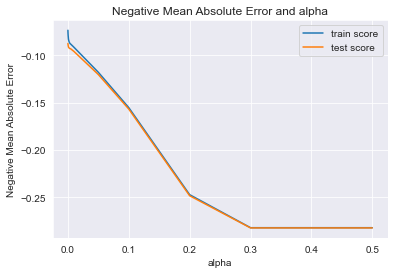

In [78]:
# Plotting the results of Grid Search 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [79]:
# Finding the optimal alpha value for lasso regressor

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [80]:
# Building the model using optimal alpha value

alpha = 0.0003
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01214821,  0.00450731,  0.01783891,  0.05540847, -0.00156958,
        0.01480877, -0.00607534,  0.06930148,  0.05285311,  0.06775398,
        0.03537392,  0.00318907,  0.01381408,  0.01694092,  0.00277098,
        0.02832644,  0.02835408,  0.00935371,  0.00484529, -0.02130924,
       -0.02224291, -0.02581903,  0.00107746,  0.00769286,  0.01323575,
        0.        ,  0.01789251,  0.02132623,  0.0067014 ,  0.01418271,
        0.00686601,  0.02298558,  0.01974418, -0.01374031,  0.01155713,
        0.0542375 ,  0.02467898,  0.03673021, -0.        , -0.        ,
       -0.        , -0.01966922, -0.03866009, -0.04328163, -0.11059668,
       -0.07844057, -0.07014372, -0.14395412, -0.07235295, -0.05356383,
        0.        , -0.07778762, -0.01631145, -0.09392758, -0.07777098,
       -0.07025813, -0.04698114,  0.00398085, -0.        , -0.01121991,
        0.00288611,  0.00983423,  0.01543053,  0.        , -0.        ,
        0.        , -0.22320022, -0.        ,  0.        ,  0.  

In [81]:
print(f'Mean squared error on test dataset: {round(metrics.mean_squared_error(y_test, lasso.predict(X_test)),4)}')

print(f'R-squared value on test dataset: {round(metrics.r2_score(y_test, lasso.predict(X_test)),4)}')

Mean squared error on test dataset: 0.0193
R-squared value on test dataset: 0.8552


In [84]:
# Finding the top 5 significant variables according to lasso regressor

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df = lasso_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
lasso_df.head(5)

,Features,Coefficient
0,TotalBsmtSF,0.069300
1,2ndFlrSF,0.067800
2,OverallCond,0.055400
3,MSZoning_FV,0.054200
4,1stFlrSF,0.052900


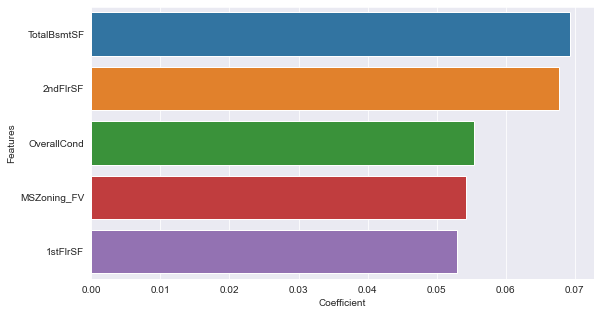

In [85]:
# Plotting top 10 significant variables along with their coefficients
plt.figure(figsize=(9,5))
sns.barplot(y = 'Features', x='Coefficient', data = lasso_df.head(5))
plt.show()

- These are the five most important predictor variables for the required case.